## Useful Gaussian Identities

#### Density Function
$$
\begin{eqnarray*}
f(x) &=& N(\mu,\Sigma)\\
& = & (2\pi)^{-\frac{d}{2}} \det(\Sigma)^{-\frac{1}{2}} \exp\left[-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \right]
\end{eqnarray*}
$$
Or in log form
$$
\log f(x) = -\frac{d}{2}\log(2\pi) - \frac{1}{2} \log\det(\Sigma) -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) 
$$

#### Linear Transformations
$$
X\sim N(\mu,\Sigma) \quad \Rightarrow \quad (AX+b)\sim N(A\mu + b, A\Sigma A^T)
$$

#### Block Definition of Joint Density
$$
\begin{eqnarray*}
f(x,y) = N\left(\left[\begin{array}{c}\mu_x\\ \mu_y\end{array}\right], \left[\begin{array}{cc}\Sigma_{xx} & \Sigma_{xy}\\ \Sigma_{xy}^T & \Sigma_{yy} \end{array}\right]\right)
\end{eqnarray*}
$$

#### Marginal Distributions
$$
\begin{eqnarray*}
f(x) = \int_{\Omega_y} f(x,y) dy = N(\mu_x, \Sigma_{xx})\\
\end{eqnarray*}
$$

#### Conditional Distributions
$$
f(x|y=\bar{y}) = N\left(\mu_x + \Sigma_{xy}\Sigma_{yy}^{-1}(\bar{y}-\mu_y), \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{xy}^T \right)
$$


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Multivariate Gaussian Density Function

In [2]:
sigma = np.array([[1, 0.5],
                  [0.5, 1.0]])

print(sigma-sigma.T)

[[0. 0.]
 [0. 0.]]


In [3]:
mu = np.ones(2)

x = np.array([0.1,0.2])


d = mu.shape[0]

sign, log_det = np.linalg.slogdet(sigma)
part = np.linalg.solve(sigma, x-mu)
log_pdf = -0.5*np.log(2.0*np.pi) - 0.5*log_det - 0.5*(x-mu).T @ part

print(log_pdf)

-1.261764163645449


In [4]:

def LogGaussianDensity(x, mu, sigma):
    
    d = mu.shape[0]

    sign, log_det = np.linalg.slogdet(sigma)
    part = np.linalg.solve(sigma, x-mu)
    log_pdf = -0.5*np.log(2.0*np.pi) - 0.5*log_det - 0.5*(x-mu).T @ part
    
    return log_pdf


In [5]:
N = 80
x1s = np.linspace(-6,6,N)
x2s = np.linspace(-6,6,N)

pdf_vals = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x = np.array([x1s[i], x2s[j]])
        pdf_vals[i,j] = np.exp( LogGaussianDensity(x, mu, sigma) )

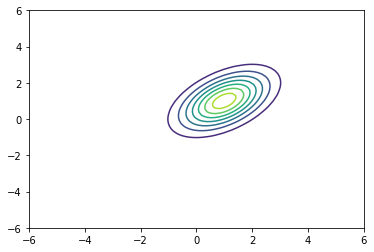

In [6]:
plt.contour(x1s,x2s,pdf_vals)

## Breakout Exercise:
Using the matrix $A$ and variance $\sigma_\epsilon^2$ defined in the following code cell, compute the mean and covariance of $AX + \epsilon$, where $A$ is a matrix, and $\epsilon$ is a vector of Gaussian random variables with mean $0$ and covariance $\sigma_\epsilon^2 I$.
1. Construct the covariance $\sigma_\epsilon^2 I$ (already done).
1. Create a new variable named `sigma2` holding the covariance
1. Create a new variable named `mu2` holding the mean.
1. (Bonus) Construct a function called `GaussianTransform` that returns the transformed mean and covariance.

In [7]:
A = np.array([[1.2,1],
              [0.5, 0.1]])


eps_var = 0.1
eps_cov = eps_var*np.eye(2)

mu2 = A @ mu 
sigma2 = A@sigma@A.T + eps_cov


In [8]:
def GaussianTransform(A, mu, sigma, eps_var):
    eps_cov = eps_var*np.eye(A.shape[0])
    
    mu2 = A@mu
    sigma2 = A@sigma@A.T + eps_cov
    
    return mu2, sigma2

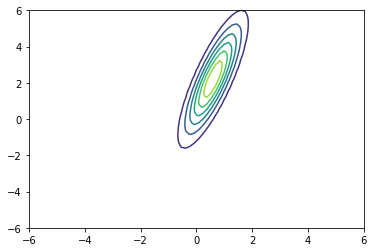

In [9]:
pdf_vals2 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x = np.array([x1s[i], x2s[j]])
        pdf_vals2[i,j] = np.exp( LogGaussianDensity(x, mu2, sigma2) )

plt.contour(x1s,x2s,pdf_vals2)

## Read the September data
The [The National Snow and Ice Data Center (NSIDC) Sea Ice Index](https://nsidc.org/data/G02135/versions/3) provides csv files containing sea ice extent and area observations since 1979.  There is one CSV file per month.

In [10]:
sep_df = pd.read_csv('data/N_09_extent_v3.0.csv',  sep="\s*,\s*", engine='python')

In [11]:
sep_df.head()

,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58
1,1980,9,Goddard,N,7.67,4.87
2,1981,9,Goddard,N,7.14,4.44
3,1982,9,Goddard,N,7.30,4.43
4,1983,9,Goddard,N,7.39,4.70


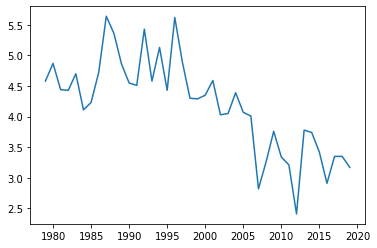

In [12]:
plt.plot(sep_df['year'], sep_df['area'])
plt.show()

In [13]:
start_year = sep_df['year'].iloc[0]
print("Data starts in ", start_year)

Data starts in  1979


In [14]:
years = sep_df['year'] - start_year
print(type(years))

<class 'pandas.core.series.Series'>


In [15]:
years = sep_df['year'].to_numpy() - start_year
print(type(years))

<class 'numpy.ndarray'>


## Construct the Vandermonde matrix

Our linear model takes the form
$$
a(t) = c_0 + c_1 t +\epsilon .
$$

When evaluates at $N$ different times $\{t_1,\ldots, t_N\}$, we can write the areas at each time $\{a_1,\ldots,a_N\}$ using matrix notation:
$$
\left[\begin{array}{c} a_1\\ \vdots\\ a_{N}\end{array}\right] = \left[\begin{array}{cc} 1 & t_1\\ \vdots & \vdots \\ 1 & t_N\end{array} \right] \left[\begin{array}{c} c_0\\ c_1\end{array}\right] + \left[\begin{array}{c} \epsilon_1\\ \vdots \\ \epsilon_N\end{array}\right],
$$
or more succinctly, as 
$$
\mathbf{a} = V\mathbf{c} + \mathbf{\epsilon},
$$
where $\mathbf{a}$ is a vector of the areas, $V$ is a Vandermonde matrix, $\mathbf{c}$ is a vector of coefficients, and $\mathbf{\epsilon}$ is a vector of the noise random variables.

In [16]:
num_years = years.shape[0]
V = np.ones((num_years,2))
V[:,1] = years

print(V)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 25.]
 [ 1. 26.]
 [ 1. 27.]
 [ 1. 28.]
 [ 1. 29.]
 [ 1. 30.]
 [ 1. 31.]
 [ 1. 32.]
 [ 1. 33.]
 [ 1. 34.]
 [ 1. 35.]
 [ 1. 36.]
 [ 1. 37.]
 [ 1. 38.]
 [ 1. 39.]
 [ 1. 40.]]


In [17]:
prior_mean = np.zeros(V.shape[1])
prior_cov = np.eye(V.shape[1])

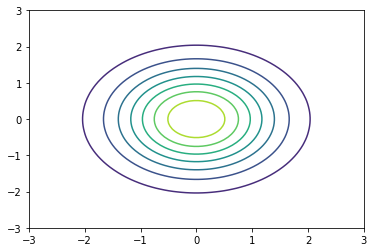

In [45]:
N = 80
x1s = np.linspace(-3,3,N)
x2s = np.linspace(-3,3,N)

pdf_vals = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x = np.array([x1s[i], x2s[j]])
        pdf_vals[i,j] = np.exp( LogGaussianDensity(x, prior_mean, prior_cov) )

plt.contour(x1s,x2s,pdf_vals)
plt.show()

### Compute the posterior mean and covariance
$$
f(x|y=\bar{y}) = N\left(\mu_x + \Sigma_{xy}\Sigma_{yy}^{-1}(\bar{y}-\mu_y), \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{xy}^T \right)
$$

In [36]:
def GaussianPosterior(xmean, xcov, V, y_obs, obs_var):
    
    b = np.zeros(V.shape[0])
    
    cross_cov = V@xcov # sigma_{xy}
    
    y_mean, y_cov = GaussianTransform(V, xmean, xcov, obs_var)
    
    post_mean = xmean + cross_cov.T @ np.linalg.solve(y_cov, y_obs-y_mean)
    post_cov = xcov - cross_cov.T @ np.linalg.solve(y_cov, cross_cov)
    
    return post_mean, post_cov

In [37]:
yobs = sep_df['area'].to_numpy()
obs_var = 0.5**2

post_mean, post_cov = GaussianPosterior(prior_mean, prior_cov, V, yobs, obs_var)

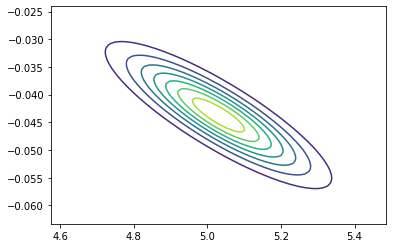

In [44]:
N = 80

# Define the points where we want to evaluate the posterior density
# Use the posterior mean and standard deviation to make sure the posterior density is centered
post_std = np.sqrt(np.diag(post_cov))
x1s = np.linspace(post_mean[0]-3.0*post_std[0],post_mean[0]+3.0*post_std[0],N)
x2s = np.linspace(post_mean[1]-3.0*post_std[1],post_mean[1]+3.0*post_std[1],N)

pdf_vals = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x = np.array([x1s[i], x2s[j]])
        pdf_vals[i,j] = np.exp( LogGaussianDensity(x, post_mean, post_cov) )

plt.contour(x1s,x2s,pdf_vals)
plt.show()

### Plot the posterior predictive distribution

In [39]:
pred_mean, pred_cov = GaussianTransform(V, post_mean, post_cov, obs_var)
pred_std = np.sqrt(np.diag(pred_cov))

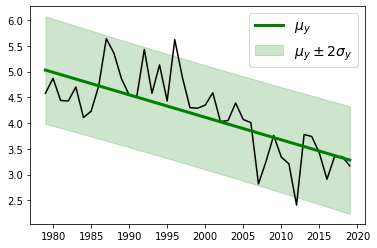

In [43]:
plt.plot(sep_df['year'], sep_df['area'], 'k')

plt.fill_between(sep_df['year'], pred_mean-2.0*pred_std, pred_mean+2.0*pred_std, color='g', alpha=0.2, label='$\mu_y\pm2\sigma_y$')
plt.plot(sep_df['year'], pred_mean, 'g', linewidth=3, label='$\mu_y$')

plt.legend(fontsize=14)
plt.show()
